In [1]:
import os

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import TSNE

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (LinearLocator, MultipleLocator, FormatStrFormatter)
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
from matplotlib import gridspec
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

print("Package is ready.")

Package is ready.


In [2]:
plt.rcParams['figure.figsize'] = ((8/2.54), (6/2.54))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams.update({'font.size': 11})
MARKER_SIZE = 15
cmap_m = ["#f4a6ad", "#f6957e", "#fccfa2", "#8de7be", "#86d6f2", "#24a9e4", "#b586e0", "#d7f293"]
cmap = ["#e94d5b", "#ef4d28", "#f9a54f", "#25b575", "#1bb1e7", "#1477a2", "#a662e5", "#c2f442"]

plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.edgecolor'] = 
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1

In [3]:
SW2_df = pd.read_csv('../weighing/results/SW2_greenhouse.csv', index_col='Unnamed: 0')
SW2_df.index = pd.DatetimeIndex(SW2_df.index)

In [4]:
rad_temp = SW2_df[SW2_df['rad'] > 10]['rad']

In [5]:
rad_temp.index = rad_temp.index.round(freq='1 d')
rad_temp = rad_temp.groupby(rad_temp.index).mean()

In [6]:
SW2_df.index = SW2_df.index.round(freq='1 d')
SW2_df = SW2_df.groupby(SW2_df.index).mean()
SW2_df['rad'] = rad_temp.values

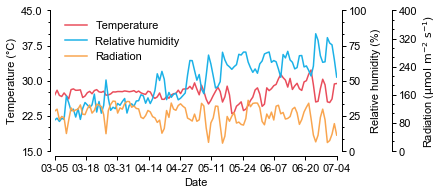

In [7]:
fig = plt.figure(figsize=((8/2.54*2), (6/2.54*1.2)))
ax0 = plt.subplot()

temp_line, = ax0.plot(SW2_df.index, SW2_df['temp'], '-', c=cmap[0], zorder=3)

ax1 = ax0.twinx()
rh_line, = ax1.plot(SW2_df.index, SW2_df['hum'], '-', c=cmap[4], zorder=2)

ax2 = ax0.twinx()
rad_line, = ax2.plot(SW2_df.index, SW2_df['rad'], '-', c=cmap[2], zorder=1)

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_position(('outward', 5))
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_position(('outward', 55))
ax2.spines['bottom'].set_visible(False)

ax0.set_xbound(SW2_df.index.min(), SW2_df.index.max())
ax0.xaxis.set_major_locator(LinearLocator(10))
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax0.yaxis.set_major_locator(LinearLocator(5))
ax0.yaxis.set_minor_locator(LinearLocator(13))
ax0.set_ybound(15, 45)
ax1.yaxis.set_major_locator(LinearLocator(5))
ax1.yaxis.set_minor_locator(LinearLocator(13))
ax1.set_ybound(0, 100)
ax2.yaxis.set_major_locator(LinearLocator(6))
ax2.yaxis.set_minor_locator(LinearLocator(16))
ax2.set_ybound(0, 400)

ax0.set_xlabel('Date')
ax0.set_ylabel('Temperature (°C)')
ax1.set_ylabel('Relative humidity (%)')
ax2.set_ylabel('Radiation (${\mu}mol{\ }m^{-2}{\ }s^{-1}$)')

plt.legend([temp_line, rh_line, rad_line], ['Temperature', 'Relative humidity', 'Radiation'], loc=2, frameon=False)
fig.tight_layout()
fig.savefig('./figures_c/Fig1.svg', transparent=True, format='svg')
#fig.savefig('./figures/Fig1.png', transparent=True, dpi=600, format='png')
plt.show() 

## Fig 1

### image examples

## Fig 2

### model

## Fig 3

### weight

In [8]:
weight_df = pd.read_csv('./results/weight.csv', index_col='Unnamed: 0')
weight_reg_df = pd.read_csv('./results/weight_reg.csv', index_col='Unnamed: 0')

In [9]:
weight_df.index = [27]*3 + [55]*3 + [86]*3 + [112]*4 + [132]*20

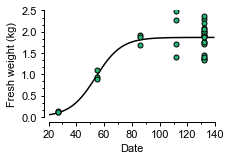

In [10]:
fig = plt.figure(figsize=((8.5/2.54), (6/2.54)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

ax0.plot(weight_reg_df.index, weight_reg_df.values/1000, c='k')
ax0.plot(weight_df.index, weight_df.sum(axis=1)/1000, 'o', ms=5, mec='k', c=cmap[3])

ax0.set_xbound(20, 140)
ax0.xaxis.set_major_locator(LinearLocator(7))
ax0.xaxis.set_minor_locator(LinearLocator(13))

ax0.yaxis.set_major_locator(LinearLocator(6))
ax0.yaxis.set_minor_locator(LinearLocator(16))
ax0.set_ybound(0, 2.5)

ax0.set_xlabel('Date')
ax0.set_ylabel('Fresh weight (kg)')

fig.tight_layout()
fig.savefig('./figures_c/Fig3.svg', transparent=True, format='svg')

## Fig 4

### accuracy

### A

In [11]:
pred_results = pd.read_csv('./results/final_output_A.csv', index_col='Unnamed: 0')

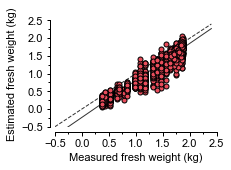

In [12]:
fig = plt.figure(figsize=((8.5/2.54), (6/2.54)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

x_linear = np.arange(-5, 25)/10
y_linear = x_linear
regr = linear_model.LinearRegression()
regr.fit(pred_results['FW_label'].values.reshape(-1, 1)/1000, pred_results['FW_pred'].values.reshape(-1, 1)/1000)
Yp = regr.predict(pred_results['FW_label'].values.reshape(-1, 1))
reg_x = np.arange(-5, 25).reshape(-1, 1)/10
reg_y = reg_x*regr.coef_ + regr.intercept_

dia_line = ax0.plot(x_linear, y_linear, 'k--', linewidth=1, alpha=0.8)
reg_line = ax0.plot(reg_x, reg_y, 'k-', linewidth=1, alpha=0.8)
pred_dots = ax0.plot(pred_results['FW_label']/1000, pred_results['FW_pred']/1000, 'o', mec='k', c=cmap[0], ms=5)

ax0.set_xbound([-0.5, 2.5])
ax0.set_ybound([-0.5, 2.5])

ax0.xaxis.set_major_locator(LinearLocator(7))
ax0.xaxis.set_minor_locator(LinearLocator(13))
ax0.yaxis.set_major_locator(LinearLocator(7))
ax0.yaxis.set_minor_locator(LinearLocator(13))

ax0.set_xlabel('Measured fresh weight (kg)')
ax0.set_ylabel('Estimated fresh weight (kg)')

fig.tight_layout()
fig.savefig('./figures_c/Fig4A.svg', transparent=True, format='svg')

In [13]:
print(regr.coef_, regr.intercept_)

[[1.045026]] [-0.23624882]


In [14]:
print(np.sqrt(mean_squared_error(pred_results['FW_label'].values.reshape(-1, 1)/1000, pred_results['FW_pred'].values.reshape(-1, 1)/1000)))
print(r2_score(pred_results['FW_label'].values.reshape(-1, 1)/1000, pred_results['FW_pred'].values.reshape(-1, 1)/1000))

0.22484337745655086
0.7898374841909366


### B

In [15]:
pred_results = pd.read_csv('./results/final_output_B.csv', index_col='Unnamed: 0')

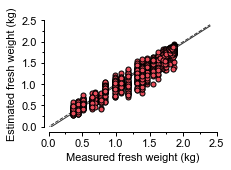

In [16]:
fig = plt.figure(figsize=((8.5/2.54), (6/2.54)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

x_linear = np.arange(-5, 25)/10
y_linear = x_linear
regr = linear_model.LinearRegression()
regr.fit(pred_results['FW_label'].values.reshape(-1, 1)/1000, pred_results['FW_pred'].values.reshape(-1, 1)/1000)
Yp = regr.predict(pred_results['FW_label'].values.reshape(-1, 1))
reg_x = np.arange(-5, 25).reshape(-1, 1)/10
reg_y = reg_x*regr.coef_ + regr.intercept_

dia_line = ax0.plot(x_linear, y_linear, 'k--', linewidth=1, alpha=0.8)
reg_line = ax0.plot(reg_x, reg_y, 'k-', linewidth=1, alpha=0.8)
pred_dots = ax0.plot(pred_results['FW_label']/1000, pred_results['FW_pred']/1000, 'o', mec='k', c=cmap[0], ms=5)

ax0.set_xbound([0, 2.5])
ax0.set_ybound([0, 2.5])

ax0.xaxis.set_major_locator(LinearLocator(6))
ax0.xaxis.set_minor_locator(LinearLocator(11))
ax0.yaxis.set_major_locator(LinearLocator(6))
ax0.yaxis.set_minor_locator(LinearLocator(11))

ax0.set_xlabel('Measured fresh weight (kg)')
ax0.set_ylabel('Estimated fresh weight (kg)')

fig.tight_layout()
fig.savefig('./figures_c/Fig4B.svg', transparent=True, format='svg')

In [17]:
print(regr.coef_, regr.intercept_)

[[1.00426035]] [-0.04030832]


In [18]:
print(np.sqrt(mean_squared_error(pred_results['FW_label'].values.reshape(-1, 1)/1000, pred_results['FW_pred'].values.reshape(-1, 1)/1000)))
print(r2_score(pred_results['FW_label'].values.reshape(-1, 1)/1000, pred_results['FW_pred'].values.reshape(-1, 1)/1000))

0.10696874465499186
0.9507496644763144


### C

In [19]:
pred_results = pd.read_csv('./results/final_output_C.csv', index_col='Unnamed: 0')

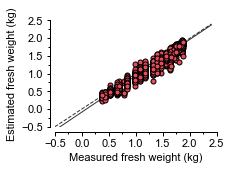

In [20]:
fig = plt.figure(figsize=((8.5/2.54), (6/2.54)))
ax0 = plt.subplot()

ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_position(('outward', 5))
ax0.spines['bottom'].set_position(('outward', 5))

x_linear = np.arange(-5, 25)/10
y_linear = x_linear
regr = linear_model.LinearRegression()
regr.fit(pred_results['FW_label'].values.reshape(-1, 1)/1000, pred_results['FW_pred'].values.reshape(-1, 1)/1000)
Yp = regr.predict(pred_results['FW_label'].values.reshape(-1, 1))
reg_x = np.arange(-5, 25).reshape(-1, 1)/10
reg_y = reg_x*regr.coef_ + regr.intercept_

dia_line = ax0.plot(x_linear, y_linear, 'k--', linewidth=1, alpha=0.8)
reg_line = ax0.plot(reg_x, reg_y, 'k-', linewidth=1, alpha=0.8)
pred_dots = ax0.plot(pred_results['FW_label']/1000, pred_results['FW_pred']/1000, 'o', mec='k', c=cmap[0], ms=5)

ax0.set_xbound([-0.5, 2.5])
ax0.set_ybound([-0.5, 2.5])

ax0.xaxis.set_major_locator(LinearLocator(7))
ax0.xaxis.set_minor_locator(LinearLocator(13))
ax0.yaxis.set_major_locator(LinearLocator(7))
ax0.yaxis.set_minor_locator(LinearLocator(13))

ax0.set_xlabel('Measured fresh weight (kg)')
ax0.set_ylabel('Estimated fresh weight (kg)')

fig.tight_layout()
fig.savefig('./figures_c/Fig4C.svg', transparent=True, format='svg')

In [21]:
print(regr.coef_, regr.intercept_)

[[1.02503479]] [-0.08582215]


In [22]:
print(np.sqrt(mean_squared_error(pred_results['FW_label'].values.reshape(-1, 1)/1000, pred_results['FW_pred'].values.reshape(-1, 1)/1000)))
print(r2_score(pred_results['FW_label'].values.reshape(-1, 1)/1000, pred_results['FW_pred'].values.reshape(-1, 1)/1000))

0.1002571706063878
0.9577908186619092


## Fig 5

### t-SNE

In [23]:
MAX = 1866.7305833920614
MIN = 5.556884360787222

In [24]:
embed_output = pd.read_csv('./results/embed_output_B.csv', index_col='Unnamed: 0')

In [25]:
embed_output['128'] = (MAX-MIN)*embed_output['128'] + MIN

In [26]:
print(embed_output['128'].max())
print(embed_output['128'].min())

1865.4007262388943
369.56744383233456


In [27]:
np.unique(embed_output['128']//300)

array([1., 2., 3., 4., 5., 6.])

In [28]:
embed_output['128'] = (embed_output['128']//300).values.astype('int')

In [29]:
test_mat = embed_output
test_mat.index = np.arange(test_mat.shape[0])

In [30]:
tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(test_mat.values[:, :-1])
tsne_result = pd.DataFrame(tsne_result, columns=['V1', 'V2']).assign(classes = test_mat['128'])

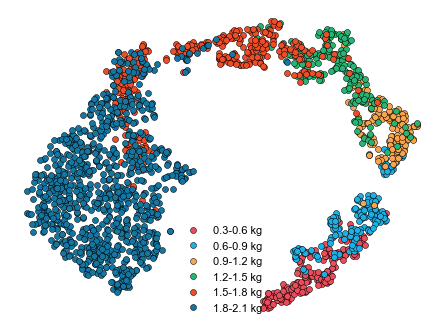

In [33]:
fig = plt.figure(figsize=((8/2.54*2), (6/2.54*2)))

ax0 = plt.subplot()
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.tick_params(axis='x', length=0)
ax0.tick_params(axis='y', length=0)
ax0.axes.xaxis.set_ticklabels([])
ax0.axes.yaxis.set_ticklabels([])

plt_01, = ax0.plot(tsne_result[tsne_result['classes'] == 1]['V1'], tsne_result[tsne_result['classes'] == 1]['V2'], 'o', c=cmap[0], ms=6, mec='k', mew=0.5)
plt_02, = ax0.plot(tsne_result[tsne_result['classes'] == 2]['V1'], tsne_result[tsne_result['classes'] == 2]['V2'], 'o', c=cmap[4], ms=6, mec='k', mew=0.5)
plt_03, = ax0.plot(tsne_result[tsne_result['classes'] == 3]['V1'], tsne_result[tsne_result['classes'] == 3]['V2'], 'o', c=cmap[2], ms=6, mec='k', mew=0.5)
plt_04, = ax0.plot(tsne_result[tsne_result['classes'] == 4]['V1'], tsne_result[tsne_result['classes'] == 4]['V2'], 'o', c=cmap[3], ms=6, mec='k', mew=0.5)
plt_05, = ax0.plot(tsne_result[tsne_result['classes'] == 5]['V1'], tsne_result[tsne_result['classes'] == 5]['V2'], 'o', c=cmap[1], ms=6, mec='k', mew=0.5)
plt_06, = ax0.plot(tsne_result[tsne_result['classes'] == 6]['V1'], tsne_result[tsne_result['classes'] == 6]['V2'], 'o', c=cmap[5], ms=6, mec='k', mew=0.5)
plt.legend([plt_01, plt_02, plt_03, plt_04, plt_05, plt_06], ['0.3-0.6 kg', '0.6-0.9 kg', '0.9-1.2 kg', '1.2-1.5 kg', '1.5-1.8 kg', '1.8-2.1 kg'], frameon=False)

fig.tight_layout()
fig.savefig('./figures_c/Fig5.svg', transparent=True, format='svg')